In [1]:
import os
import mne
from glob import glob

In [2]:
os.getcwd()

'C:\\proj\\EEG01\\zajecia_02'

In [3]:
cd C:\Users\swps\Dropbox\CURRENT PROJECTS\Decyzyjne Diamenty\WYCZYSZCZONE DANE

C:\Users\swps\Dropbox\CURRENT PROJECTS\Decyzyjne Diamenty\WYCZYSZCZONE DANE


In [4]:
pliki = glob('*.set')

In [5]:
raw = mne.io.read_raw_eeglab(pliki[0], preload=True)

Events like the following will be dropped entirely: ['more info', 'response'], 2 in total
141/243 event codes could not be mapped to integers. Use the 'event_id' parameter to map such events manually.
Reading D10_1.fdt
Reading 0 ... 127236  =      0.000 ...   508.944 secs...


<ipython-input-5-d1a82903befe>:1: RuntimeWarning: Events like the following will be dropped entirely: ['more info', 'response'], 2 in total
  raw = mne.io.read_raw_eeglab(pliki[0], preload=True)
<ipython-input-5-d1a82903befe>:1: RuntimeWarning: 141/243 event codes could not be mapped to integers. Use the 'event_id' parameter to map such events manually.
  raw = mne.io.read_raw_eeglab(pliki[0], preload=True)


In [7]:
%matplotlib inline

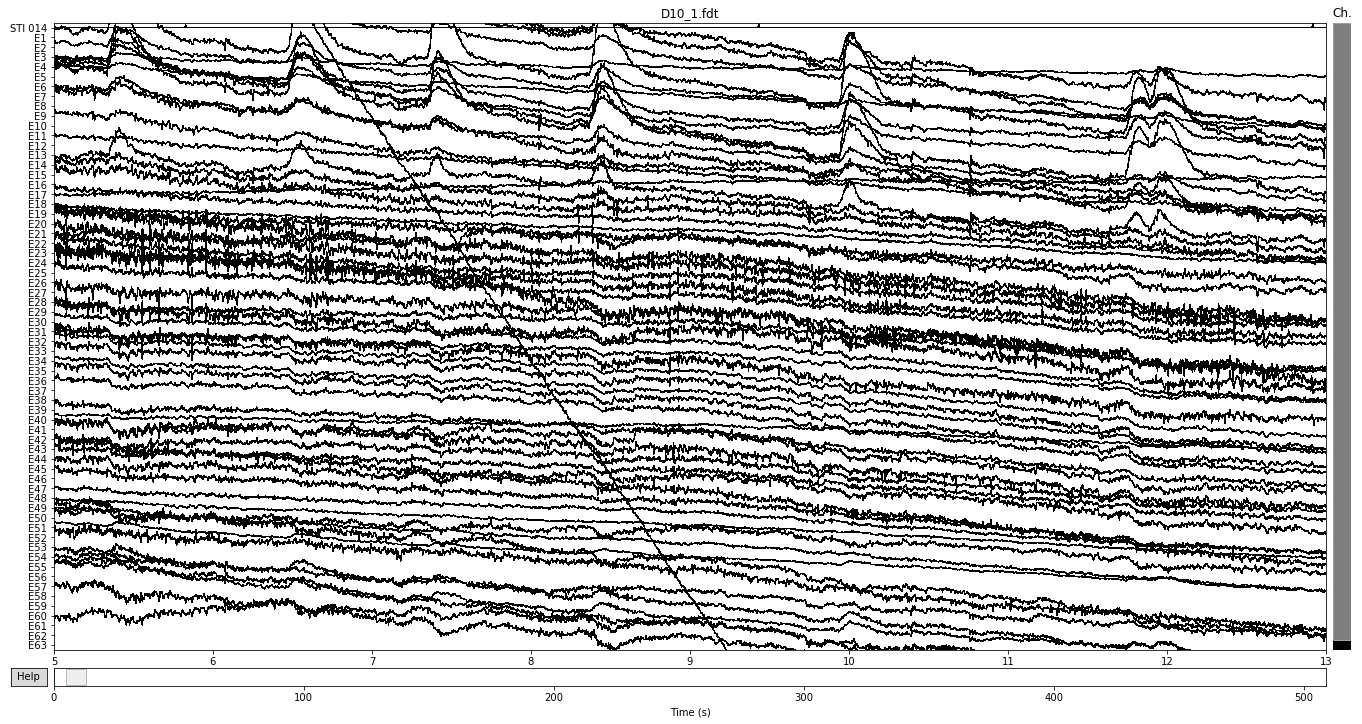

In [8]:
raw.plot(start=5, duration=8, n_channels=64);

Setting up high-pass filter at 0.5 Hz
l_trans_bandwidth chosen to be 0.5 Hz
Filter length of 3300 samples (13.200 sec) selected


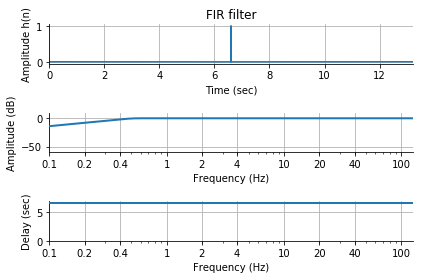

In [10]:
# zobaczymy własności filtra, którego chcemy użyć
# kodem poniżej się nie przejmujcie zanadto, chciałem Wam
# tylko pokazać aby zwracać uwagę na transition band:
h = mne.filter.create_filter(raw._data, raw.info['sfreq'], 0.5, None)
mne.viz.plot_filter(h, raw.info['sfreq']);

Setting up high-pass filter at 0.5 Hz
Filter length of 8250 samples (33.000 sec) selected


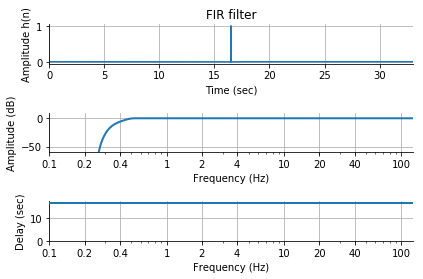

In [11]:
h = mne.filter.create_filter(raw._data, raw.info['sfreq'], 0.5, None, l_trans_bandwidth=0.2)
mne.viz.plot_filter(h, raw.info['sfreq']);

Te różnice w środkowym wykresie mogą mieć spore znaczenie, porównajcie poniżej:

Setting up high-pass filter at 0.5 Hz
l_trans_bandwidth chosen to be 0.5 Hz
Filter length of 3300 samples (13.200 sec) selected


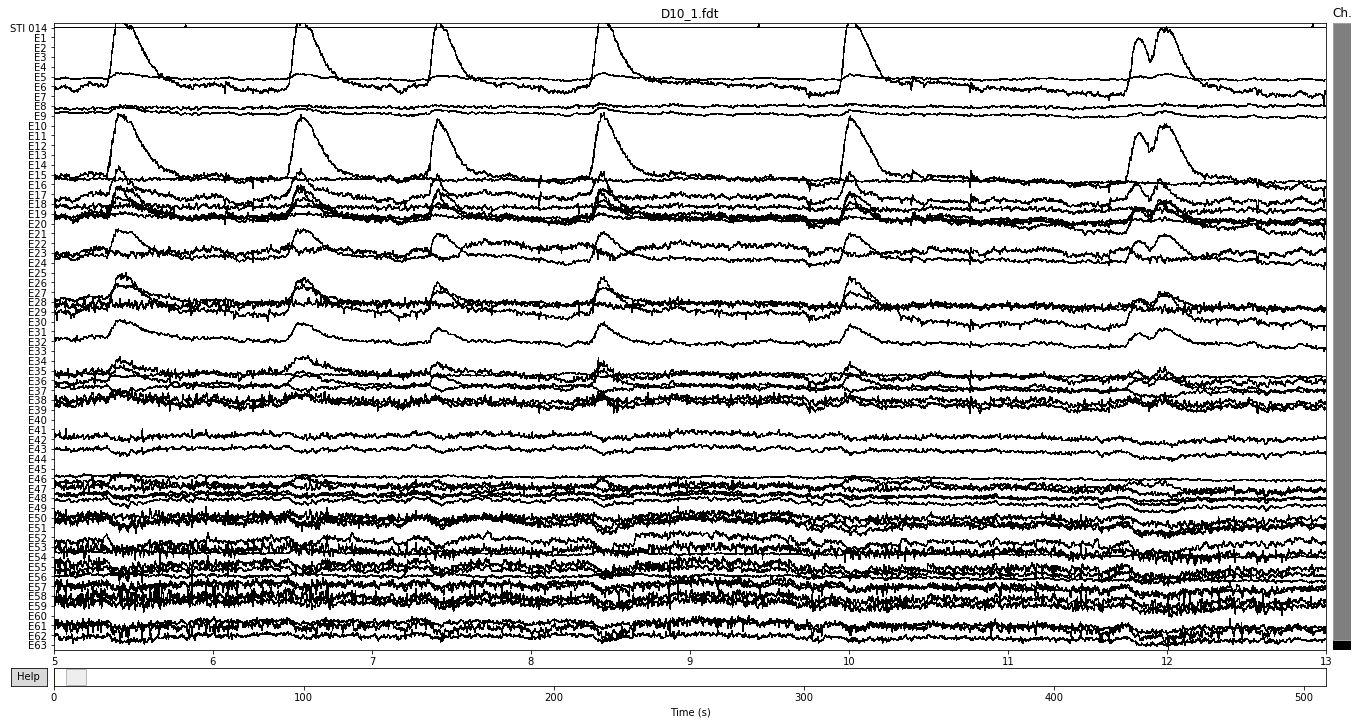

In [12]:
raw2 = raw.copy().filter(0.5, None)
raw2.plot(start=5, duration=8, n_channels=64, remove_dc=False);

Setting up high-pass filter at 0.5 Hz
Filter length of 8250 samples (33.000 sec) selected


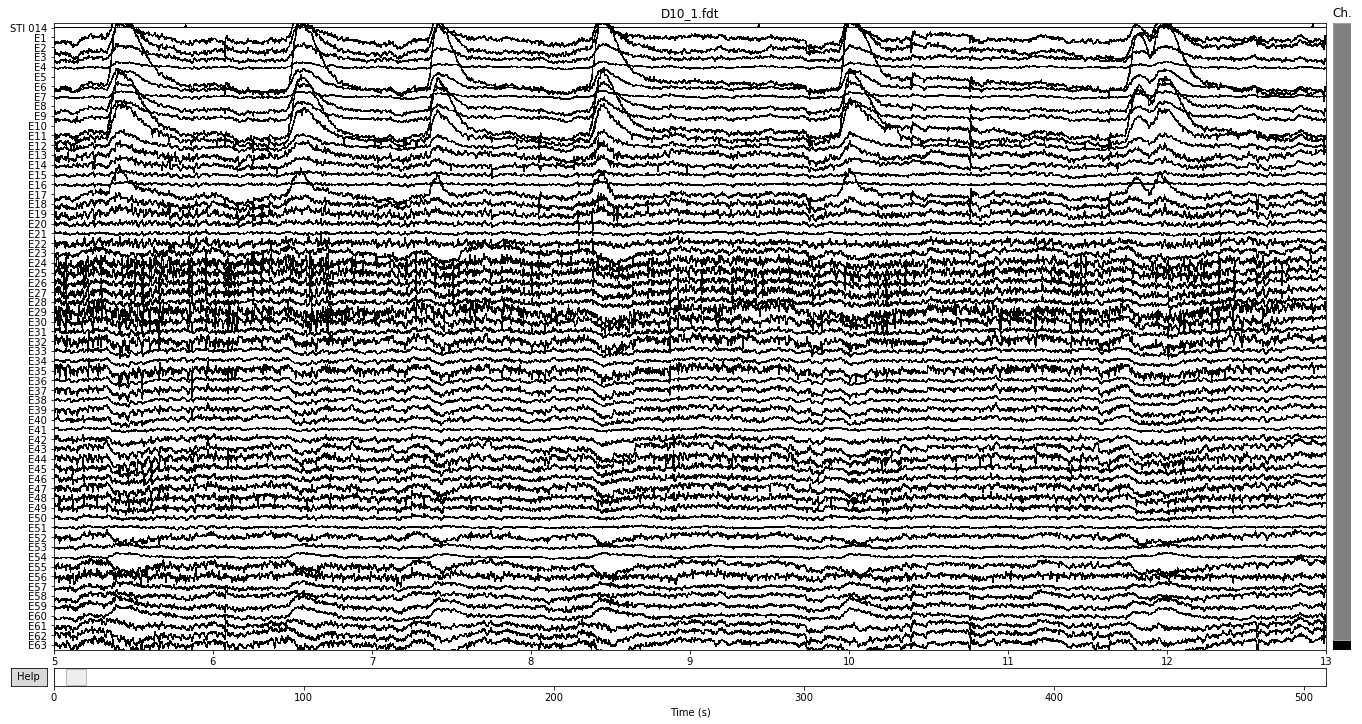

In [14]:
raw3 = raw.copy().filter(0.5, None, l_trans_bandwidth=0.2)
raw3.plot(start=5, duration=8, n_channels=64, remove_dc=False);

Widzimy, że ważne jest aby kontrolować odpowiednio low transition bandwidth, bo inaczej zostaje nam sporo niskich częstotliwości w danych. Dlatego gdy będziecie w przyszłości filtrować dane używajcie `l_trans_bandwidth` równego 0.5 * dolny próg filtrowania.

Wczytamy sobie plik `sternberg_diam_011_AK.set` - to dane zarejestrowane w tzw. procedurze Sternberg'a. *tutaj opowiem Wam trochę o procedurze*

In [18]:
# usuniemy wcześniejsze pliki raw, raw2 i raw3:
del raw, raw2, raw3

In [21]:
raw = mne.io.read_raw_eeglab('sternberg_diam_011_AK.set', preload=True)

The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
Events like the following will be dropped entirely: ['boundary'], 1 in total
1/2103 event codes could not be mapped to integers. Use the 'event_id' parameter to map such events manually.
Reading sternberg_diam_011_AK.fdt
Reading 0 ... 492347  =      0.000 ...  1969.388 secs...


<ipython-input-21-77cff314c70b>:1: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab('sternberg_diam_011_AK.set', preload=True)
<ipython-input-21-77cff314c70b>:1: RuntimeWarning: Events like the following will be dropped entirely: ['boundary'], 1 in total
  raw = mne.io.read_raw_eeglab('sternberg_diam_011_AK.set', preload=True)
<ipython-input-21-77cff314c70b>:1: RuntimeWarning: 1/2103 event codes could not be mapped to integers. Use the 'event_id' parameter to map such events manually.
  raw = mne.io.read_raw_eeglab('sternberg_diam_011_AK.set', preload=True)


In [22]:
# wydarzenia - tu opowiem Wam kilka słów
events = mne.find_events(raw)
events[:5, :]

2102 events found
Events id: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20 100 111]


array([[   1,    0,  111],
       [5644,    0,  100],
       [5832,    0,    2],
       [5957,    0,    5],
       [6082,    0,   10]], dtype=int64)

Wydarzenia o wartościach 1 - 10 to prezentacja cyfr, które trzeba zapamiętać. (10 to cyfra zero, reszta normalnie). 11-20 to pytania - wyświetlana jest cyfra i trzeba powiedzieć czy była pośród zapamiętywanych. Dla pytań wystarczy odjąć 10 i mamy informację o wyświetlonej cyfrze pytającej w tym samym systemie co ten od wyświetlanych cyfr do zapamiętywania (1-10).

Chcemy wyciąć sygnał na prezentację cyfr tzn. wydarzenia 1 - 10. Zrobimy sobię listę interesujących nas wydarzeń:

In [23]:
prezentacje = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Tniemy sygnał na wycinki korzystając z `mne.Epochs`, pamiętajcie o tym, że często pomocna będzie [dokumentacja](http://martinos.org/mne/dev/generated/mne.Epochs.html)!

In [24]:
epoki = mne.Epochs(raw, events=events, event_id=prezentacje, tmin=-0.25, tmax=0.5, preload=True)

1257 matching events found
0 projection items activated
Loading data for 1257 events and 188 original time points ...
0 bad epochs dropped
